In [1]:
import cmath
import functools
import math
import operator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def exp_by_limit(z: complex, n: int = 10) -> complex:
    """極限値による定義"""

    N = 10 ** n
    return pow(1 + z / N, N)

In [3]:
def factorial(n: int):
    return functools.reduce(operator.mul, range(1, n + 1), 1)


def exp_by_series(z: complex, n: int = 30) -> complex:
    """無限級数による定義"""

    return sum(pow(z, i) / factorial(i) for i in range(n))

In [4]:
def exp_by_real_func(z: complex) -> complex:
    """実関数による定義"""
    x, y = z.real, z.imag
    i = 0 + 1j
    return math.exp(x) * (math.cos(y) + math.sin(y) * i)

In [5]:
exp_by_limit(cmath.pi * (0 + 1j))

(-1+5.66553889764798e-16j)

In [6]:
exp_by_series(cmath.pi * (0 + 1j))

(-1.0000000000000002+3.461777852236587e-16j)

In [7]:
exp_by_real_func(cmath.pi * (0 + 1j))

(-1+1.2246467991473532e-16j)

In [8]:
cmath.exp(cmath.pi * (0 + 1j))

(-1+1.2246467991473532e-16j)

In [9]:
exp_by_series(1)

2.7182818284590455

In [10]:
def cos_by_series(z, n=30):
    return sum((-1) ** i * pow(z, 2 * i) / factorial(2 * i) for i in range(n))

In [11]:
def cos_by_exp(z):
    i = 0 + 1j
    return (cmath.exp(i * z) + cmath.exp(-i * z)) / 2

In [12]:
cos_by_series(cmath.pi + 0j)

(-1.0000000000000002+0j)

In [13]:
cos_by_exp(cmath.pi + 0j)

(-1+0j)

In [14]:
cmath.cos(cmath.pi + 0j)

(-1-0j)

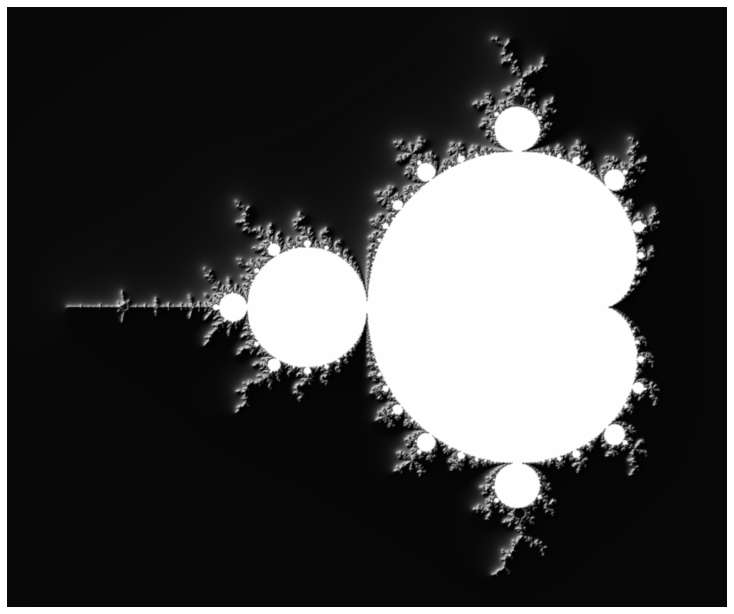

In [15]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import colors


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float64)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float64)
    C = X + Y[:, None] * 1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I] ** 2 + C[I]
    N[N == maxiter - 1] = 0
    return Z, N


xmin, xmax, xn = -2.25, +0.75, 3000 // 2
ymin, ymax, yn = -1.25, +1.25, 2500 // 2
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log(np.log(horizon)) / np.log(2)
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

with np.errstate(invalid="ignore"):
    M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z))) / np.log(2) + log_horizon)

dpi = 72
width = 10
height = 10 * yn / xn
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=0)
M = light.shade(
    M, cmap=plt.cm.binary, vert_exag=1.5, norm=colors.PowerNorm(0.01), blend_mode="hsv"
)
plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

plt.show()

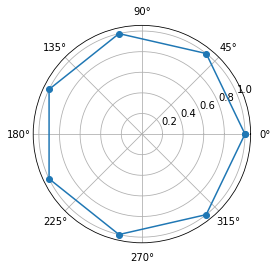

In [16]:
N = 7
roots_of_one = [cmath.exp(((2 * cmath.pi * k) / N) * (0 + 1j)) for k in range(N + 1)]
angles = list(map(cmath.phase, roots_of_one))
length = list(map(abs, roots_of_one))
plt.polar(angles, length, "-o")

In [17]:
roots_of_one = [cmath.exp(((2 * cmath.pi * k) / N) * (0 + 1j)) for k in range(N + 1)]
sum(roots_of_one)

(0.9999999999999999-2.4492935982947064e-16j)

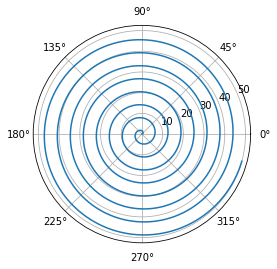

In [18]:
angles = np.linspace(0, 50, 1000, dtype=np.float64)
plt.polar(angles, angles)

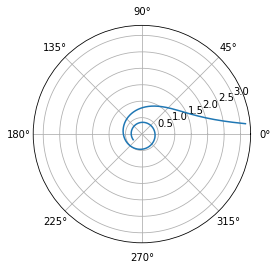

In [19]:
@np.vectorize
def lituus(theta):
    return 1 / np.sqrt(theta)

angles = np.linspace(0.1, 10, 1000, dtype=np.float64)
length = lituus(angles)


plt.polar(angles, length, '-')

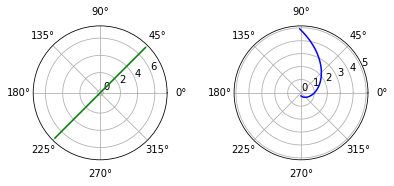

In [20]:
x = np.linspace(-5, 5, 10000, dtype=np.float64)
y = np.linspace(-5, 5, 10000, dtype=np.float64)
c = x + y * 1j
fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))

angles = np.angle(c)
length = np.abs(c)
ax[0].plot(angles, length, color="g")
exp_c = np.exp(c / np.pi)
exp_angles = np.angle(exp_c)
exp_length = np.abs(exp_c)
ax[1].plot(exp_angles, exp_length, color="b")
plt.subplots_adjust(wspace=0.5)
plt.show()

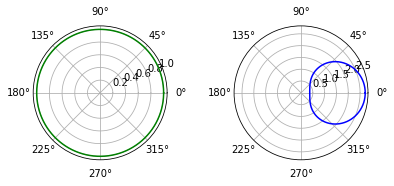

In [21]:
length = np.ones(10000, dtype=np.float64)
angles = np.linspace(0, 2 * np.pi, 10000, dtype=np.float64)
c = np.array([cmath.rect(r, theta) for r, theta in zip(length, angles)])

fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))

ax[0].plot(angles, length, color="g")
exp_c = np.exp(c)
exp_angles = np.angle(exp_c)
exp_length = np.abs(exp_c)
ax[1].plot(exp_angles, exp_length, color="b")
plt.subplots_adjust(wspace=0.5)
plt.show()

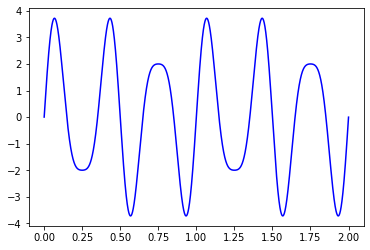

In [22]:
def f(t: float) -> float:
    """2つの正弦波からなる合成波"""
    return 3 * math.sin(3 * 2 * math.pi * t) + math.sin(5 * 2 * math.pi * t)

# 2つの正弦波からなる合成波
ts = [t / 32768 for t in range(65536)]
fs = [f(t) for t in ts]

plt.plot(ts, fs, linestyle="-", color="blue")
# plt.savefig("sine_curve.png", dpi=600)

<StemContainer object of 3 artists>

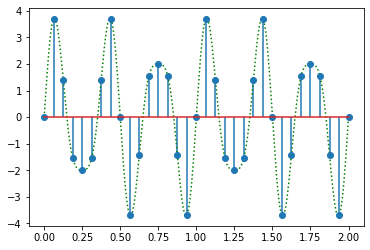

In [23]:
fig, ax = plt.subplots()

sampling_freq = 16

# 2つの正弦波からなる合成波
ax.plot(ts, fs, linestyle=":", color="green")

# サンプリングしたもの
sampling_ts = [t / sampling_freq for t in range(2 * sampling_freq + 1)]
sampling_fs = [f(t) for t in sampling_ts]
ax.stem(sampling_ts, sampling_fs, use_line_collection=True)
# fig.savefig("sampling.png", dpi=600)

In [24]:
# 離散Fourier変換（高速Fourier変換ではない！）

Fs = [
    sum(
        sampling_fs[n] * cmath.exp((0 - 2j) * cmath.pi * k * n / sampling_freq)
        for n in range(sampling_freq)
    )
    for k in range(sampling_freq)
]

<StemContainer object of 3 artists>

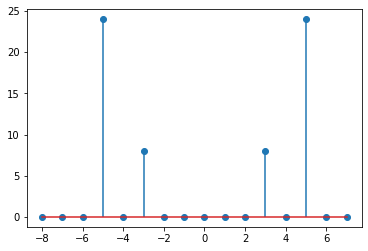

In [25]:
plt.stem(range(-sampling_freq // 2, sampling_freq // 2), list(map(abs, Fs)), use_line_collection=True)
# plt.savefig("stem.png", dpi=600)

In [26]:
# 逆離散Fourier変換
inverse_Fs = [
    sum(
        (1 / sampling_freq)
        * Fs[n]
        * cmath.exp((0 + 2j) * cmath.pi * k * n / sampling_freq)
        for n in range(sampling_freq)
    )
    for k in range(sampling_freq)
]

# 実部だけ取り出す
inverse_Fs_real = list(map(operator.attrgetter("real"), inverse_Fs))

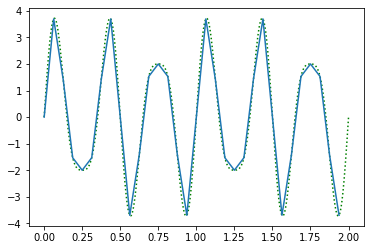

In [27]:
fig, ax = plt.subplots()

# 2つの正弦波からなる合成波
ts = [t / 32768 for t in range(65536)]
fs = [f(t) for t in ts]
ax.plot(ts, fs, linestyle=":", color="green")

# 逆離散Fourier変換の実部だけをつないでプロットしてみる
ax.plot([t / sampling_freq for t in range(2 * sampling_freq)], inverse_Fs_real + inverse_Fs_real, linestyle="-")